In [1]:
#import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

###Loading the data

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/training.csv')
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:

#checking for null values
train_df.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [4]:

#checking for duplicates
train_df.duplicated().sum()

0

In [5]:

#overview of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
train_df['CountryCode'].value_counts()

256    95662
Name: CountryCode, dtype: int64

In [7]:
train_df['CurrencyCode'].value_counts()

UGX    95662
Name: CurrencyCode, dtype: int64

From above, it is observed that primary source of the data is Uganda

In [8]:
train_df['Amount'].describe()

count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


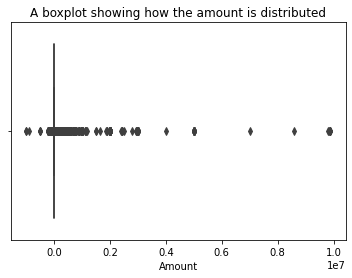

In [9]:

#visualizing how the amount is distributed
sns.boxplot(train_df['Amount'])
plt.title('A boxplot showing how the amount is distributed')
plt.show()

In [10]:

#converting the transaction start time column to datetime
train_df['TransactionStartTime'] = pd.to_datetime(train_df['TransactionStartTime'])

Extracting the year, month, and day from the start time column

In [11]:
train_df['Month'] = train_df['TransactionStartTime'].dt.month

In [12]:
train_df['Year'] = train_df['TransactionStartTime'].dt.year

In [13]:
train_df['Day'] = train_df['TransactionStartTime'].dt.day

In [14]:
train_df['Month'].value_counts()

12    35635
1     31783
2     15772
11    12472
Name: Month, dtype: int64

In [15]:
train_df['ProviderId'].value_counts()

ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: ProviderId, dtype: int64

In [16]:
train_df['ProductId'].value_counts()

ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: ProductId, dtype: int64

In [17]:
train_df['ProductCategory'].value_counts()

financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: ProductCategory, dtype: int64

In [18]:
train_df['ChannelId'].value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: ChannelId, dtype: int64

In [19]:
train_df['PricingStrategy'].value_counts()

2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64

In [20]:
train_df['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

From above, we can see that the dataset is highly imbalanced. Therefore, accuracy won't be the appropriate metric for the data. Other metrics like precision and recall will be used to evaluate the data.

### Feature Encoding

In [21]:
cat_cols = ['ProviderId', 'ProductCategory', 'ChannelId', 'ProductId']

In [22]:
le = LabelEncoder()
for cat_col in cat_cols:
  train_df[cat_col] = le.fit_transform(train_df[cat_col])

In [23]:
train_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Month,Year,Day
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,2,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,11,2018,15
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,1,-20.0,20,2018-11-15 02:19:08+00:00,2,0,11,2018,15
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,2,500.0,500,2018-11-15 02:44:21+00:00,2,0,11,2018,15
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,2,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,11,2018,15
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,1,-644.0,644,2018-11-15 03:34:21+00:00,2,0,11,2018,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,3,19,2,1,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,2,2019,13
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,5,1,0,2,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,2,2019,13
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,3,19,2,1,-20.0,20,2019-02-13 09:54:35+00:00,2,0,2,2019,13
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,5,8,7,2,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,2,2019,13


In [24]:
for col in cat_cols:
    print(train_df[col].value_counts())

3    38189
5    34186
4    14542
0     5643
2     3084
1       18
Name: ProviderId, dtype: int64
2    45405
0    45027
8     1920
1     1613
7     1279
5      216
3      175
6       25
4        2
Name: ProductCategory, dtype: int64
2    56935
1    37141
3     1048
0      538
Name: ChannelId, dtype: int64
19    32635
16    24344
1     15384
6     11964
0      2885
17     2403
11     1512
2      1377
8       965
5       789
4       296
9       236
10      216
21      197
14      175
12      112
20       86
15       31
18       25
22       17
7        10
3         2
13        1
Name: ProductId, dtype: int64


Creating a column called credit that outputs 0 if the amount is less than 1 else 1

In [25]:
def credit(row):
  if row < 1:
    return 0
  else:
    return 1

In [26]:
train_df['Credit'] = train_df['Amount'].apply(credit)
train_df['Credit']

0        1
1        0
2        1
3        1
4        0
        ..
95657    0
95658    1
95659    0
95660    1
95661    0
Name: Credit, Length: 95662, dtype: int64

In [27]:

#dropping unnecessary columns in preparation for modelling 
train_data = train_df.drop(columns=['TransactionId','BatchId', 'SubscriptionId', 
                                    'CustomerId', 'AccountId', 'Amount', 'CountryCode', 'CurrencyCode', 'TransactionStartTime'])
train_data

,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,Month,Year,Day,Credit
0,5,1,0,2,1000,2,0,11,2018,15,1
1,3,19,2,1,20,2,0,11,2018,15,0
2,5,0,0,2,500,2,0,11,2018,15,1
3,0,11,8,2,21800,2,0,11,2018,15,1
4,3,19,2,1,644,2,0,11,2018,15,0
...,...,...,...,...,...,...,...,...,...,...,...
95657,3,19,2,1,1000,2,0,2,2019,13,0
95658,5,1,0,2,1000,2,0,2,2019,13,1
95659,3,19,2,1,20,2,0,2,2019,13,0
95660,5,8,7,2,3000,2,0,2,2019,13,1


### Feature correlation

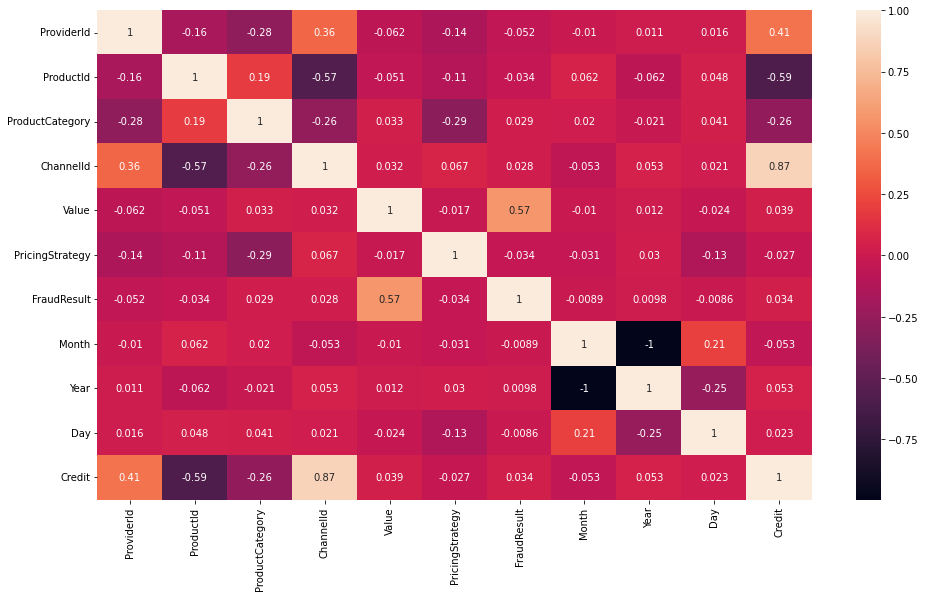

In [28]:

plt.figure(figsize=(16, 9))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [29]:
X = train_data.drop(['FraudResult'], axis=1).values

In [30]:
y = train_data['FraudResult'].values.reshape(-1,1)

In [31]:
print(X.shape, y.shape)

(95662, 10) (95662, 1)


### Train-test split validation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

###Logistic Regression model

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(rescaledX_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
pred = log.predict(rescaledX_test)

In [38]:
log.score(rescaledX_test, y_test)

0.9979093348200285

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28643
           1       0.43      0.23      0.30        56

    accuracy                           1.00     28699
   macro avg       0.72      0.62      0.65     28699
weighted avg       1.00      1.00      1.00     28699



### Random forest model

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(rescaledX_train, y_train)

<ipython-input-41-bbbbab638058>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(rescaledX_train, y_train)


RandomForestClassifier()

In [42]:
pred_forest = forest.predict(rescaledX_test)

In [43]:
forest.score(rescaledX_test, y_test)

0.9995818669640057

In [44]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28643
           1       0.91      0.88      0.89        56

    accuracy                           1.00     28699
   macro avg       0.95      0.94      0.95     28699
weighted avg       1.00      1.00      1.00     28699



Random forest proved to be the optimal model as deduced from the classification report above. It gave better precision and recall for the positive class compared to the traditional logistic regression.

### Working on the test data

In [45]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')
test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:56:28Z,2
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:57:38Z,1
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:59:17Z,1
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:59:39Z,2


In [46]:

#converting the transaction start time column to datetime
test['TransactionStartTime'] = pd.to_datetime(test['TransactionStartTime'])

In [47]:
test['Month'] = test['TransactionStartTime'].dt.month

In [48]:
test['Year'] = test['TransactionStartTime'].dt.year

In [49]:
test['Day'] = test['TransactionStartTime'].dt.day

In [50]:
test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Month,Year,Day
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13 10:01:40+00:00,4,2,2019,13
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13 10:02:12+00:00,2,2,2019,13
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 10:02:30+00:00,2,2,2019,13
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13 10:02:38+00:00,4,2,2019,13
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13 10:02:58+00:00,2,2,2019,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14 23:56:28+00:00,2,3,2019,14
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14 23:57:38+00:00,1,3,2019,14
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14 23:59:17+00:00,1,3,2019,14
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14 23:59:39+00:00,2,3,2019,14


In [51]:
cat_cols
for col in cat_cols:
    print(test[col].value_counts())

ProviderId_4    18256
ProviderId_6    15821
ProviderId_5     6977
ProviderId_1     2391
ProviderId_3     1568
ProviderId_2        6
Name: ProviderId, dtype: int64
financial_services    21700
airtime               20923
data_bundles            914
utility_bill            740
tv                      459
retail                  184
movies                   78
ticket                   16
transport                 5
Name: ProductCategory, dtype: int64
ChannelId_3    38090
ChannelId_2     6198
ChannelId_5      602
ChannelId_1      102
ChannelId_4       27
Name: ChannelId, dtype: int64
ProductId_6     15186
ProductId_3     10310
ProductId_10     8482
ProductId_15     6007
ProductId_1      1212
ProductId_4       875
ProductId_11      867
ProductId_21      566
ProductId_14      473
ProductId_19      334
ProductId_26      184
ProductId_13      105
ProductId_24       78
ProductId_8        74
ProductId_22       69
ProductId_7        42
ProductId_2        41
ProductId_16       35
ProductId_25      

In [52]:
lex = LabelEncoder()
for cat_col in cat_cols:
  test[cat_col] = lex.fit_transform(test[cat_col])

In [53]:
for col in cat_cols:
    print(test[col].value_counts())

3    18256
5    15821
4     6977
0     2391
2     1568
1        6
Name: ProviderId, dtype: int64
2    21700
0    20923
1      914
8      740
7      459
4      184
3       78
5       16
6        5
Name: ProductCategory, dtype: int64
2    38090
1     6198
4      602
0      102
3       27
Name: ChannelId, dtype: int64
22    15186
19    10310
1      8482
5      6007
0      1212
20      875
2       867
12      566
4       473
9       334
17      184
3       105
15       78
24       74
13       69
23       42
10       41
6        35
16       31
11       16
18        9
8         7
7         6
21        5
25        3
14        2
Name: ProductId, dtype: int64


In [54]:
test['Credit'] = test['Amount'].apply(credit)
test['Credit']

0        1
1        1
2        0
3        1
4        0
        ..
45014    0
45015    1
45016    1
45017    0
45018    1
Name: Credit, Length: 45019, dtype: int64

In [55]:

#dropping unnecessary columns in preparation for modelling 
test_data = test.drop(columns=['TransactionId','BatchId', 'SubscriptionId', 
                                    'CustomerId', 'AccountId', 'Amount', 'CountryCode', 'CurrencyCode', 'TransactionStartTime'])
test_data

,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,Month,Year,Day,Credit
0,4,19,0,2,1000,4,2,2019,13,1
1,4,5,2,2,2000,2,2,2019,13,1
2,3,22,2,1,50,2,2,2019,13,0
3,4,1,0,2,3000,4,2,2019,13,1
4,3,22,2,1,60,2,2,2019,13,0
...,...,...,...,...,...,...,...,...,...,...
45014,3,22,2,2,5000,2,3,2019,14,0
45015,2,1,0,2,10000,1,3,2019,14,1
45016,2,1,0,2,10000,1,3,2019,14,1
45017,3,22,2,2,5000,2,3,2019,14,0


In [56]:
original_test = test_data.values
original_test

array([[   4,   19,    0, ..., 2019,   13,    1],
       [   4,    5,    2, ..., 2019,   13,    1],
       [   3,   22,    2, ..., 2019,   13,    0],
       ...,
       [   2,    1,    0, ..., 2019,   14,    1],
       [   3,   22,    2, ..., 2019,   14,    0],
       [   4,   19,    0, ..., 2019,   14,    1]])

In [57]:
scale = StandardScaler()
rescaledtest = scaler.fit_transform(original_test)


In [58]:
prediction = forest.predict(rescaledtest)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
set(prediction)

{0, 1}